# Classification

In [85]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

## Preliminary analysis of the data

In this exercise, you'll be working with a dataset obtained from the UCI Machine Learning Repository consisting of votes made by US House of Representatives Congressmen. Your goal will be to predict their party affiliation ('Democrat' or 'Republican') based on how they voted on certain key issues. Here, it's worth noting that we have preprocessed this dataset to deal with missing values. This is so that your focus can be directed towards understanding how to train and evaluate supervised learning models. 

Once you have mastered these fundamentals, you will be introduced to preprocessing techniques and have the chance to apply them there yourself - including on this very same dataset!

Before thinking about what supervised learning models you can apply to this, however, it is advised to first perform a preliminary data analysis in order to understand the structure of the data. 

**Task instructions**

Get started with your analysis now by exploring this voting records dataset numerically. All data is put into a DataFrame called `df`. Use `pandas`' `.head()`, `.info()`, and `.describe()` methods to explore the DataFrame, and select the statement below that is not true.

* The DataFrame has a total of 435 rows and 17 columns.

* Except for 'party', all of the columns are of type int64.

* The first two rows of the DataFrame consist of votes made by Republicans and the next three rows consist of votes made by Democrats.

* There are 17 predictor variables, or features, in this DataFrame.

* The target variable in this DataFrame is 'party'.

In [86]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

df = pd.read_table("data/house-votes-84.data", sep=",", header=None, na_values="?")
col_names = ['party', 'infants', 'water', 'budget', 'physician', 'salvador',
       'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels',
       'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']
df = df.fillna(0)
df.columns = col_names 

df.head(3)

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,0,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,0
2,democrat,0,y,y,0,y,y,n,n,n,n,y,n,y,y,n,n


In [87]:
for col in col_names[1:]:
    df[col]=np.where(df[col]=="n",0,1)

In [88]:
df.sample(3)

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
95,democrat,1,0,1,0,1,1,0,1,1,0,1,1,1,1,1,1
413,republican,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1
386,democrat,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1


The previous numerical analysis gave you some very important information, such as the names and data types of the columns, and the dimensions of the DataFrame. Following this with some visual analysis will give you an even better understanding of the data.  As you may have noticed all the features in this dataset are binary; that is, they are either 0 or 1. Such data can be visualized with a `Seaborn`'s countplot.

A countplot of the 'education' bill can be generated using the following code:

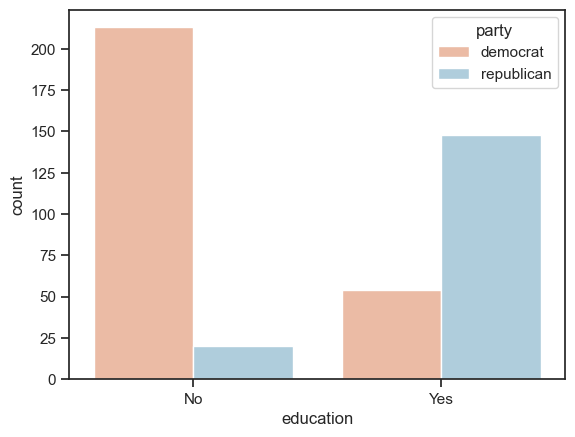

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

plt.figure() 
sns.countplot(x='education', hue='party', data=df, palette='RdBu') 
plt.xticks([0,1], ['No', 'Yes']) 
plt.show() 

In `sns.countplot()`, we specify the x-axis data to be 'education', and hue to be 'party'. Recall that 'party' is also our target variable. So the resulting plot shows the difference in voting behavior between the two parties for the 'education' bill, with each party colored differently. We manually specified the color to be 'RdBu', as the Republican party has been traditionally associated with red, and the Democratic party with blue.
It seems like Democrats voted resoundingly against this bill, compared to Republicans. This is the kind of information that our machine learning model will seek to learn when we try to predict party affiliation solely based on voting behavior. An expert in U.S politics may be able to predict this without machine learning, but probably not instantaneously - and certainly not if we are dealing with hundreds of samples!

**Task instructions**

Explore the voting behavior further by generating countplots for the 'satellite' and 'missile' bills, and answer the following question: Of these two bills, for which ones do Democrats vote resoundingly in favor of, compared to Republicans? Be sure to begin your plotting statements for each figure with plt.figure() so that a new figure will be set up. Otherwise, your plots will be overlayed onto the same figure.

* 'satellite'.

* 'missile'.

* Both 'satellite' and 'missile'.

* Neither 'satellite' nor 'missile'.

1. Satellite 

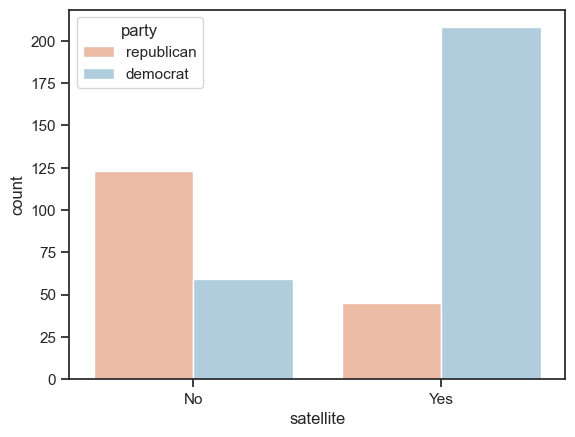

In [90]:

plt.figure() 
sns.countplot(x='satellite', hue='party', data=df, palette='RdBu') 
plt.xticks([0,1], ['No', 'Yes']) 
plt.show() 

2. Missile

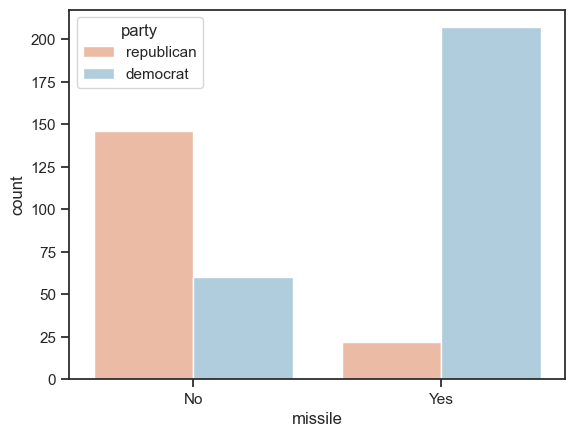

In [91]:

plt.figure() 
sns.countplot(x='missile', hue='party', data=df, palette='RdBu') 
plt.xticks([0,1], ['No', 'Yes']) 
plt.show() 

3. Both 'satellite' and 'missile'.


## k-Nearest Neighbors: Fit

Having explored the Congressional voting records dataset, it is time now to build your first classifier. In this exercise, you will fit a k-Nearest Neighbors classifier to the voting dataset, which is available in a DataFrame `df`.

You need to ensure that your data adheres to the format required by the `scikit-learn` API. The features need to be in an array where each column is a feature and each row a different observation or data point - in this case, a Congressman's voting record. The target needs to be a single column with the same number of observations as the feature data. Notice we named the feature array `X` and response variable `y`: This is in accordance with the common `scikit-learn` practice.

Your job is to create an instance of a k-NN classifier with 6 neighbors (by specifying the `n_neighbors` parameter) and then fit it to the data. The data has been pre-loaded into a DataFrame called `df`.

**Task instructions**

* Import `KNeighborsClassifier` from `sklearn.neighbors`.

* Create arrays `X` and `y` for the features and the target variable (already performed). Note the use of `.drop()` to drop the target variable 'party' from the feature array `X` as well as the use of the `.values` attribute to ensure `X` and `y` are `NumPy` arrays. Without using `.values`, `X` and `y` are a DataFrame and Series respectively; the `scikit-learn` API will accept them in this form also as long as they are of the right shape.

* Instantiate a `KNeighborsClassifier` called knn with 6 neighbors by specifying the `n_neighbors` parameter.

* Fit the classifier to the data using the `.fit()` method.

In [93]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=6)

## k-Nearest Neighbors: Predict

Having fit a k-NN classifier, you can now use it to predict the label of a new data point. However, there is no unlabeled data available since all of it was used to fit the model! You can still use the `.predict()` method on the `X` that was used to fit the model, but it is not a good indicator of the model's ability to generalize to new, unseen data.

A random unlabeled data point has been generated and is available to you as `X_new`. You will use your classifier to predict the label for this new data point, as well as on the training data `X` that the model has already seen. Using `.predict()` on `X_new` will generate 1 prediction, while using it on `X` will generate 435 predictions: 1 for each sample.

Again use the `X` and target variable array `y` yourself.

**Task instructions**

* Create arrays for the features and the target variable from `df`. As a reminder, the target variable is 'party'.
* Instantiate a `KNeighborsClassifier` with 6 neighbors.
* Fit the classifier to the data.
* Predict the labels of the training data, `X`.
* Predict the label of the new data point `X_new`.

In [94]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier 

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X,y)

# Predict the labels for the training data X
y_pred = knn.predict(X)

# Predict and print the label for the new data point X_new
X_new = df.sample(n=7).drop('party', axis=1).values
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))

Prediction: ['democrat' 'democrat' 'democrat' 'democrat' 'republican' 'republican'
 'republican']


## The digits recognition dataset

Up until now, you have been performing binary classification, since the target variable had two possible outcomes. In the following exercises, you'll be working with the MNIST digits recognition dataset, which has 10 classes, the digits 0 through 9! A reduced version of the MNIST dataset is one of scikit-learn's included datasets, and that is the one we will use in this exercise.

Each sample in this `scikit-learn` dataset is an 8x8 image representing a handwritten digit. Each pixel is represented by an integer in the range 0 to 16, indicating varying levels of black. Recall that `scikit-learn`'s built-in datasets are of type Bunch, which are dictionary-like objects. Helpfully for the MNIST dataset, `scikit-learn` provides an 'images' key in addition to the 'data' and 'target' keys that you have seen with the Iris data. Because it is a 2D array of the images corresponding to each sample, this 'images' key is useful for visualizing the images. On the other hand, the 'data' key contains the feature array - that is, the images as a flattened array of 64 pixels.

Notice that you can access the keys of these Bunch objects in two different ways: By using the `.` notation, as in `digits.images`, or the `[]` notation, as in `digits['images']`.

**Task instructions**
* Import datasets from sklearn and `matplotlib.pyplot` as `plt`.
* Load the digits dataset using the `.load_digits()` method on datasets.
* Print the keys and DESCR of digits.
* Print the shape of images and data keys using the `.` notation.
* Display the 1011th image using `plt.imshow()`. 

Keys: dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
Description: .. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided

<function matplotlib.pyplot.show(close=None, block=None)>

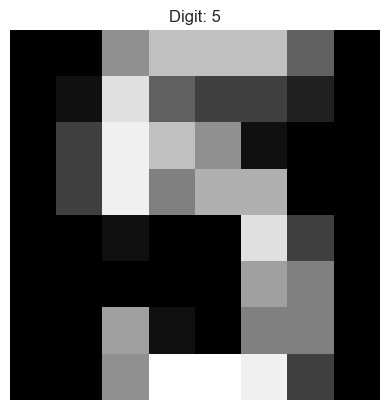

In [95]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits

digits=datasets.load_digits()

# Print the keys and DESCR of the dataset

print('Keys:', digits.keys())
print('Description:',digits.DESCR)

# Print the shape of the images and data keys
print("\nShape of 'images':", digits.images.shape)
print("Shape of 'data':", digits.data.shape)

# Display digit 1010

number_1010=digits.images[1010]
target_1010=digits.target[1010]

plt.imshow(number_1010,cmap='gray')
plt.title(f'Digit: {target_1010}')
plt.axis('off')
plt.show



## Train/Test Split + Fit/Predict/Accuracy

Now that you have learned about the importance of splitting your data into training and test sets, it's time to practice doing this on the digits dataset! After creating arrays for the features and target variable, you will split them into training and test sets, fit a k-NN classifier to the training data, and then compute its accuracy using the `.score()` method.

**Task instructions**

* Import `KNeighborsClassifier` from `sklearn.neighbors` and `train_test_split` from `sklearn.model_selection`.
* Create an array for the features using `digits.data` and an array for the target using `digits.target`.
* Create stratified training and test sets using 0.2 for the size of the test set. Use a random state of 42. Stratify the split according to the labels so that they are distributed in the training and test sets as they are in the original dataset.
* Create a k-NN classifier with 7 neighbors and fit it to the training data.
* Compute and print the accuracy of the classifier's predictions using the `.score()` method.

In [96]:
from sklearn.model_selection import train_test_split
# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a k-NN classifier with 7 neighbors: knn
knn=KNeighborsClassifier(n_neighbors=7)
# Fit the classifier to the training data
knn.fit(X_train,y_train)
# Print the accuracy
print(knn.score(X, y))

0.9905397885364496


## Overfitting and underfitting

You will now construct such a model complexity curve for the digits dataset! In this exercise, you will compute and plot the training and testing accuracy scores for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of `k`, you will develop your intuition for overfitting and underfitting.

The training and testing sets are available to you in the workspace as `X_train`, `X_test`, `y_train`, `y_test`. In addition, `KNeighborsClassifier` has been imported from `sklearn.neighbors`.

**Task instructions**

* Inside the for loop:
    * Setup a k-NN classifier with the number of neighbors equal to `k`.
    * Fit the classifier with `k` neighbors to the training data.
    * Compute accuracy scores the training set and test set separately using the `.score()` method and assign the results to the `train_accuracy` and `test_accuracy` arrays respectively.

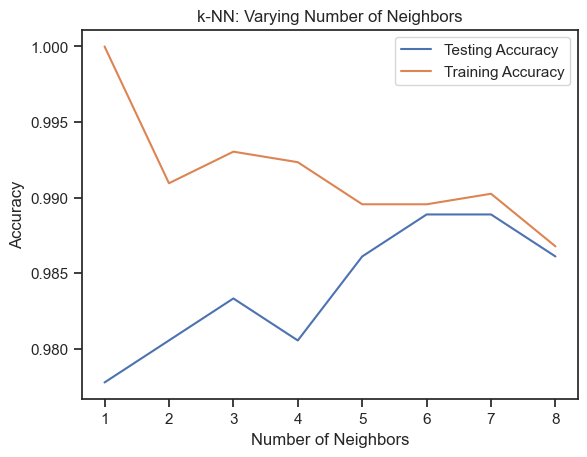

In [97]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn=KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


## Support vector machines 

You will now construct SVM models for the Iris dataset from scikit-learn! Here, the third column represents the petal length, and the fourth column the petal width of the flower samples. The classes are already converted to integer labels where 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica.

In this exercise, you will compute and plot the decision surface for both the linear and non-linear variants of the SVM. 

First, we define a function to plot decision regions. This is already prepared for you below. 

In [121]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'o', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                        np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    color=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    facecolors='none',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

**Task instructions**

* Select from the iris data (done for you) the third and fourth feature to have a 2-D feature vector for each example.
* Split the available data into 70% training and 30% test.
* Standardize the data.
* Build a linear SVM model having complexity parameters `C` set to 1.
* Plot the decision function.

Class labels: [0 1 2]


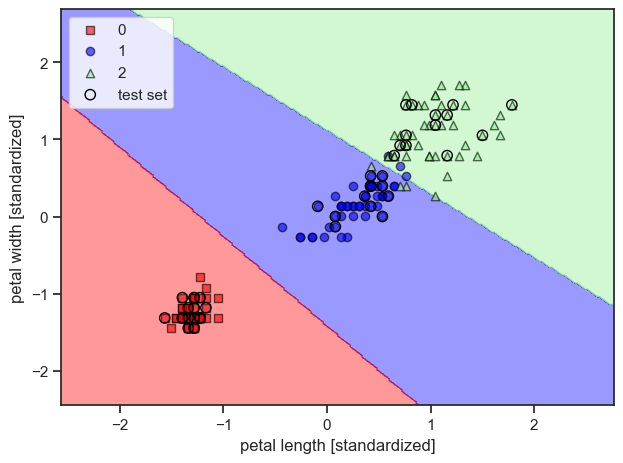

In [123]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import numpy as np

# load data
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

# split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# standardize the features
sc = StandardScaler()
sc.fit(X)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
# build SVM model
svm = SVC(C=1, kernel='linear', random_state=0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                    classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Solving non-linear problems using a kernel SVM

Now, let's try a non-linear SVM model on an XOR data set. First, the data set is constructed and visualized.

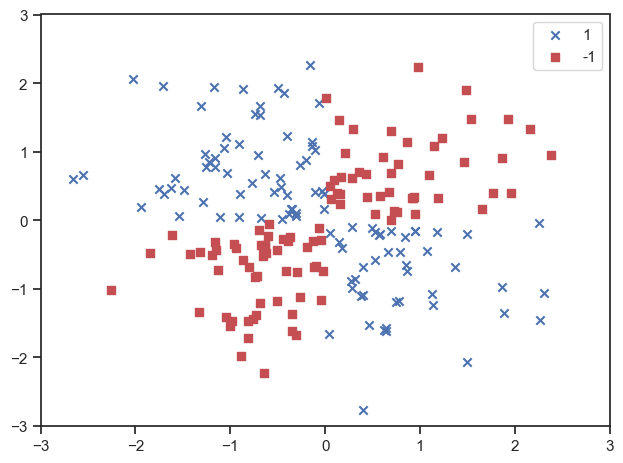

In [124]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

**Task instructions**

* Fit an SVM model based on an RBF kernel, and hyper-parameters `gamma` set to 100 and `C` equal to 1.

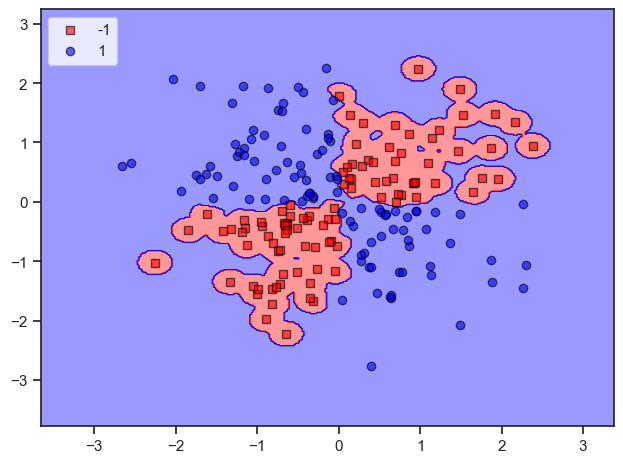

In [125]:
svm = SVC(C=1, kernel='rbf', gamma=100, random_state=0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

**Task instructions**

* Fit an SVM model based on an RBF kernel, and hyper-parameters `gamma` set to 0.2 and `C` equal to 0.1.
* Compare the decision function with the previous setting. 

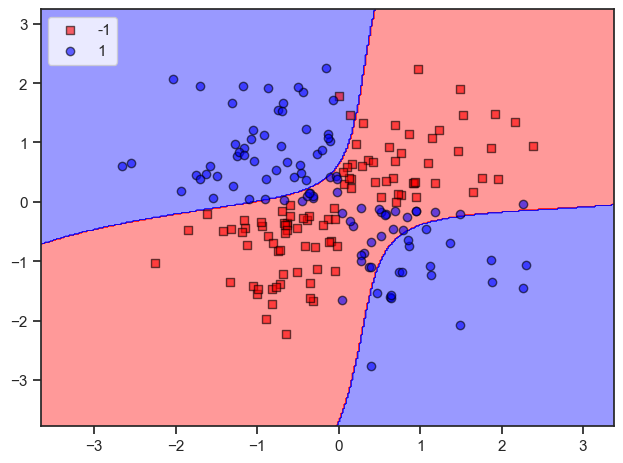

In [126]:
svm = SVC(C=0.1, kernel='rbf', gamma=0.2, random_state=0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()